#### Applied Machine Learning and Data Engineering in Business Context

Final Project

December 1, 2021

### Steel Plate Fault Detection

Alisa Ilina		
Anurag Singh	
Eirik Egge		
Henry Stoll		
Magnus Eliassen	
Olivia Lundholm	

# Analysis

In [0]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pyspark.sql.functions as f 
# expr, col, max
from pyspark.ml.functions import vector_to_array

In [0]:
df = spark.sql("SELECT * from steel_faults")

target_columns = ["Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]
categorical_feature_columns = ['TypeOfSteel_A300', 'TypeOfSteel_A400', 'Outside_Global_Index']

# separate categorical and numerical variables
# df_cat = df[target_columns + categorical_columns]

# X and y
X = df.drop(*target_columns, "labels")
y = df[target_columns]

numerical_feature_columns = X.drop(*categorical_feature_columns).columns

# pandas
df_pd = df.toPandas()

# high level summery statistics
display(df.summary())

summary,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,id,labels
count,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801
mean,607.70516379789,641.5624652970572,1658387.6940588562,1658421.4975013882,934.199888950583,61.11104941699056,45.858411993337036,97863.07440310938,88.46141032759579,129.2870627429206,1463.6057745696835,0.42365352581898946,0.5763464741810106,81.08273181565797,0.3498532481954467,0.4037922820655186,0.5575178789561337,0.024024042198778427,0.6349316490838417,0.8435451415880073,0.576624097723487,2.367754913936706,1.266025208217646,1.3386425874514052,0.09015880066629658,-0.13318561910049964,0.5531932815102717,0.084952803997779,0.10327595780122155,0.1521377012770683,0.03997779011660189,0.03053858967240422,0.2220988339811216,0.36701832315380345,900.0,null
stddev,519.1810444461635,503.13557440794045,1806844.5875607312,1806844.0635941837,1841.5436622633215,83.18471343981889,53.42348055894891,191850.86141395816,29.58108975546679,18.808369717316907,148.44733091411481,0.4942740804003558,0.4942740804003558,55.885073901512214,0.30064585578707625,0.13290185163562704,0.2622589709770535,0.03562106546672749,0.228459188886479,0.21061124774753034,0.48127485477759974,0.6723662570186197,0.41924415400121334,0.3981011703934495,0.5065045832429514,0.15302623104395935,0.3313342009786646,0.2788888876599223,0.3044034894027016,0.3592540650431753,0.195961446196276,0.17211168461854082,0.41577268522832644,0.482125438031856,520.0482349423626,null
min,0,4,6712,6724,2,2,1,250,0,37,1227,0,0,40,0.0,0.0,0.009,0.0015,0.0874,0.0484,0.0,0.301,0.301,0.0,-0.991,-0.9989,0.119,0,0,0,0,0,0,0,0,Bumps
25%,91,192,441418,441483,80,14,13,9057,72,124,1358,0,0,40,0.0665,0.3056,0.359,0.0065,0.4706,0.6923,0.0,1.9031,1.0,1.0792,-0.3478,-0.1984,0.2408,0,0,0,0,0,0,0,450,null
50%,517,544,1164921,1164931,155,24,23,17363,92,127,1364,0,1,70,0.2581,0.4,0.5385,0.0095,0.6539,0.9677,1.0,2.1903,1.1461,1.301,0.1111,-0.1439,0.4399,0,0,0,0,0,0,0,900,null
75%,1069,1090,2212600,2212608,479,58,54,49765,107,135,1654,1,1,85,0.6031,0.49,0.8,0.0177,0.8,1.0,1.0,2.6803,1.3979,1.6532,0.5294,-0.0639,0.9809,0,0,0,0,0,0,1,1350,null
max,1705,1713,12987661,12987692,8709,578,338,996980,203,253,1794,1,1,300,0.9952,0.9275,1.0,0.2175,1.0,1.0,1.0,3.94,2.5224,2.4928,0.9467,0.6421,1.0,1,1,1,1,1,1,1,1800,Z_Scratch


In [0]:
display(df.summary())

summary,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,id,labels
count,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801,1801
mean,607.70516379789,641.5624652970572,1658387.6940588562,1658421.4975013882,934.199888950583,61.11104941699056,45.858411993337036,97863.07440310938,88.46141032759579,129.2870627429206,1463.6057745696835,0.42365352581898946,0.5763464741810106,81.08273181565797,0.3498532481954467,0.4037922820655186,0.5575178789561337,0.024024042198778427,0.6349316490838417,0.8435451415880073,0.576624097723487,2.367754913936706,1.266025208217646,1.3386425874514052,0.09015880066629658,-0.13318561910049964,0.5531932815102717,0.084952803997779,0.10327595780122155,0.1521377012770683,0.03997779011660189,0.03053858967240422,0.2220988339811216,0.36701832315380345,900.0,null
stddev,519.1810444461635,503.13557440794045,1806844.5875607312,1806844.0635941837,1841.5436622633215,83.18471343981889,53.42348055894891,191850.86141395816,29.58108975546679,18.808369717316907,148.44733091411481,0.4942740804003558,0.4942740804003558,55.885073901512214,0.30064585578707625,0.13290185163562704,0.2622589709770535,0.03562106546672749,0.228459188886479,0.21061124774753034,0.48127485477759974,0.6723662570186197,0.41924415400121334,0.3981011703934495,0.5065045832429514,0.15302623104395935,0.3313342009786646,0.2788888876599223,0.3044034894027016,0.3592540650431753,0.195961446196276,0.17211168461854082,0.41577268522832644,0.482125438031856,520.0482349423626,null
min,0,4,6712,6724,2,2,1,250,0,37,1227,0,0,40,0.0,0.0,0.009,0.0015,0.0874,0.0484,0.0,0.301,0.301,0.0,-0.991,-0.9989,0.119,0,0,0,0,0,0,0,0,Bumps
25%,91,192,441418,441483,80,14,13,9057,72,124,1358,0,0,40,0.0665,0.3056,0.359,0.0065,0.4706,0.6923,0.0,1.9031,1.0,1.0792,-0.3478,-0.1984,0.2408,0,0,0,0,0,0,0,450,null
50%,517,544,1164921,1164931,155,24,23,17363,92,127,1364,0,1,70,0.2581,0.4,0.5385,0.0095,0.6539,0.9677,1.0,2.1903,1.1461,1.301,0.1111,-0.1439,0.4399,0,0,0,0,0,0,0,900,null
75%,1069,1090,2212600,2212608,479,58,54,49765,107,135,1654,1,1,85,0.6031,0.49,0.8,0.0177,0.8,1.0,1.0,2.6803,1.3979,1.6532,0.5294,-0.0639,0.9809,0,0,0,0,0,0,1,1350,null
max,1705,1713,12987661,12987692,8709,578,338,996980,203,253,1794,1,1,300,0.9952,0.9275,1.0,0.2175,1.0,1.0,1.0,3.94,2.5224,2.4928,0.9467,0.6421,1.0,1,1,1,1,1,1,1,1800,Z_Scratch


In [0]:
# TODO
# check for class imbalance
# count of target variables

label = df.select(target_columns).groupBy().sum()
display(label)

# Creating an addition expression using `join`
expression = '+'.join(target_columns)
assert df.withColumn('sum', f.expr(expression)).select(f.max("sum")).collect()[0][0] == 1

sum(Pastry),sum(Z_Scratch),sum(K_Scatch),sum(Stains),sum(Dirtiness),sum(Bumps),sum(Other_Faults)
153,186,274,72,55,400,661


In [0]:
# Pairplot
# sns.pairplot(data=df_pd.sample(n=200),);

## Scaling & Assembling

In [0]:
from pyspark.ml.feature import VectorAssembler, OneHotEncoder, StandardScaler, RobustScaler
from pyspark.ml import Pipeline

#             X       
# categorical | numerical
#    |             |
#    |    VectorAssember_numerical -> numverical_vector
#    |             |
#    |          StdScaler -> scaled_vector
#    |-------------|
#           |
#      VectorAssember -> features
# 

va_numerical = VectorAssembler(inputCols=numerical_feature_columns, outputCol="numerical_vector")
    
scaler = RobustScaler(inputCol="numerical_vector", outputCol="scaled_vector")

va = VectorAssembler(inputCols=categorical_feature_columns + ["scaled_vector"], outputCol="features")


pipeline = Pipeline(stages=[va_numerical, scaler, va])

model = pipeline.fit(df)
X = model.transform(df)

## Dimensionality Reduction

In [0]:
# Dimensionality reduction only using scaled data
from pyspark.ml.feature import PCA

def calc_explained_var(k):
    pca = PCA(k=k, inputCol="scaled_vector", outputCol="pca_features")
    model_pca = pca.fit(X)
    return model_pca.explainedVariance
cummulative_explained_variability = pd.DataFrame(np.cumsum(calc_explained_var(20)))

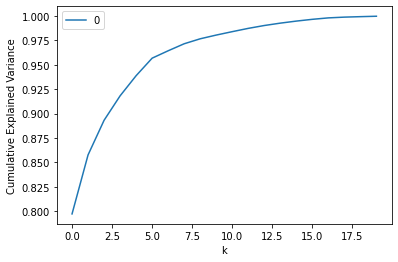

In [0]:
ax = sns.lineplot(data=cummulative_explained_variability);
ax.set_xlabel("k")
ax.set_ylabel("Cumulative Explained Variance");

In [0]:
# === PCA ===
pca_k = 4
pca = PCA(k=pca_k, inputCol="scaled_vector", outputCol="pca_features")

model_pca = pca.fit(X)

pca_prediction = model_pca.transform(X)

explained_var = model_pca.explainedVariance
print(f"sum of {explained_var} = {explained_var.sum():.2%} explained variance")

sum of [0.7973737437463464,0.06038687203855994,0.035436449432321424,0.025008375873544465] = 91.82% explained variance

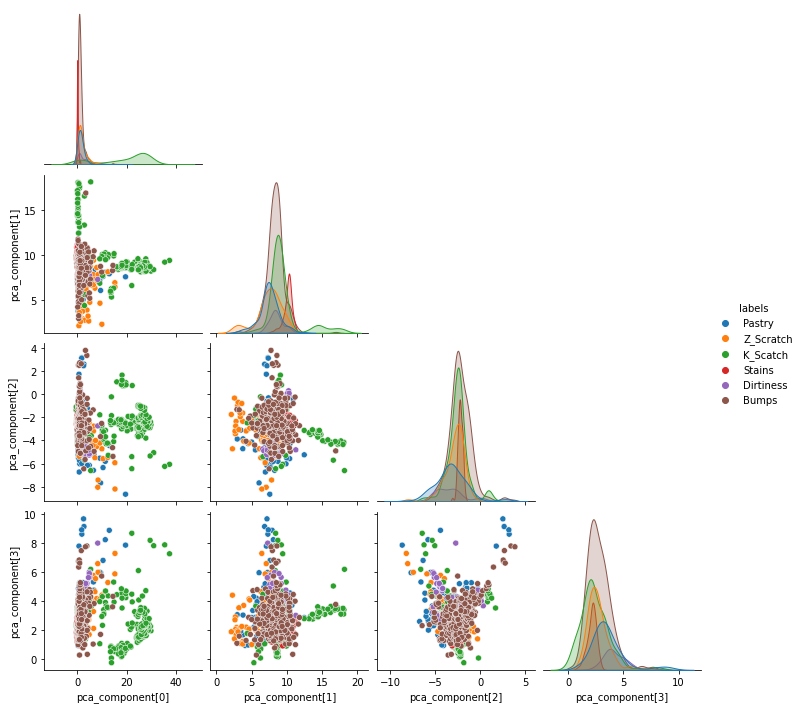

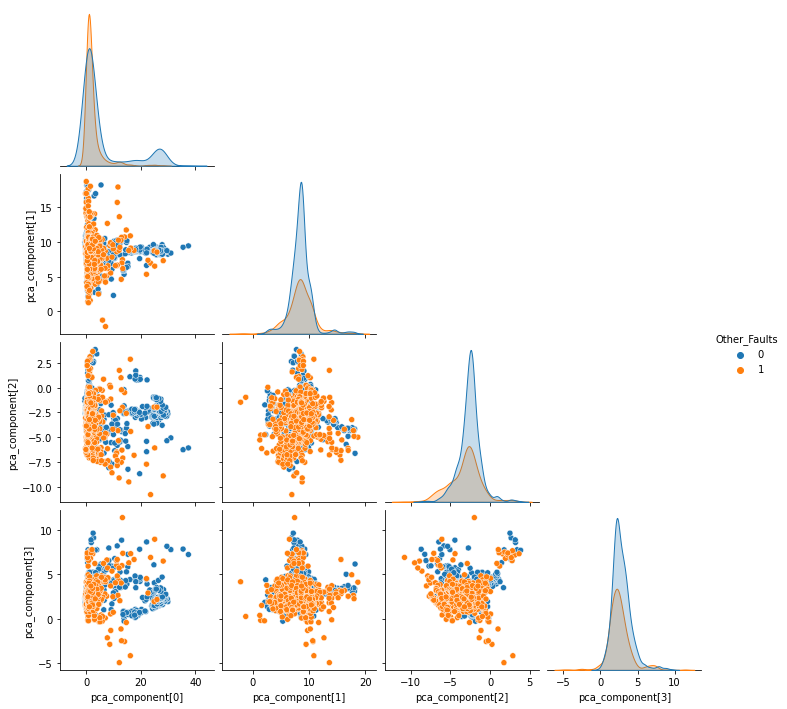

In [0]:
# visualize PCA
pca_prediction_pd = (pca_prediction.withColumn("pca_component", vector_to_array("pca_features"))).select(["labels", "Other_Faults"] + [f.col("pca_component")[i] for i in range(pca_k)]).toPandas()
pca_columns = [f"pca_component[{i}]" for i in range(pca_k)]


pca_prediction_common_pd = pca_prediction_pd[~pca_prediction_pd["labels"].str.contains("Other_Faults")]
sns.pairplot(data=pca_prediction_common_pd, hue="labels", vars=pca_columns, corner=True);
sns.pairplot(data=pca_prediction_pd, hue="Other_Faults", vars=pca_columns, corner=True);

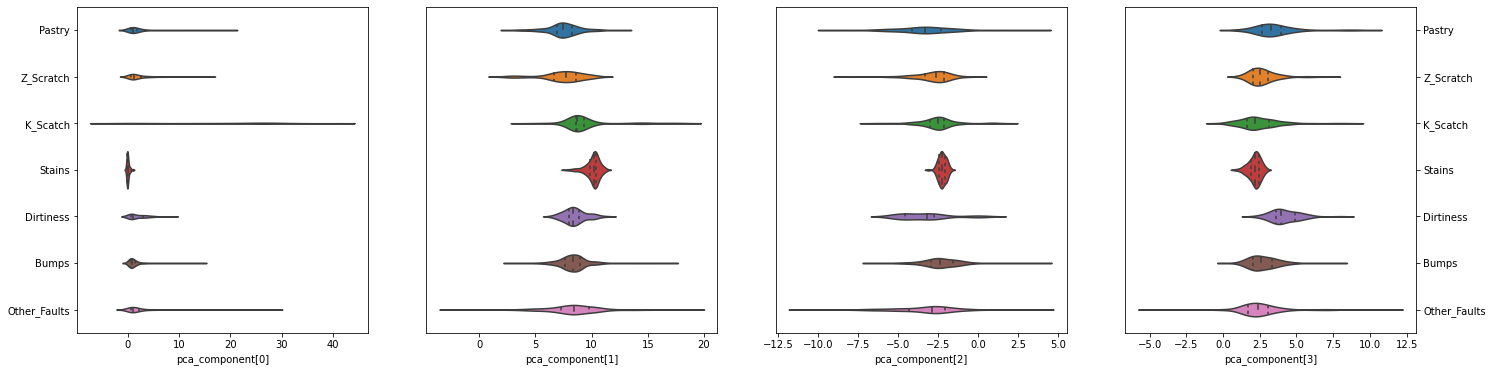

In [0]:
# sns.violinplot(y="pca_component[0]", x="pca_component[1]", hue="Other_Faults", data=pca_prediction_pd);
fig, ax = plt.subplots(1, pca_k, figsize=(24, 6))

for i in range(pca_k):
    sns.violinplot(x=f"pca_component[{i}]", y="labels", data=pca_prediction_pd, inner="quartile", dodge=False, ax=ax[i]);
    ax[i].set(ylabel=None)
    if i == 0:
        pass
#         ax[i].tick_params(bottom=True, top=False, left=True, right=False, labelbottom=True, labeltop=False, labelleft=True, labelright=True)
    elif i == pca_k - 1:
        ax[i].tick_params(bottom=True, top=False, left=False, right=True, labelbottom=True, labeltop=False, labelleft=False, labelright=True)
    else:
        ax[i].tick_params(bottom=True, top=False, left=False, right=False, labelbottom=True, labeltop=False, labelleft=False, labelright=False)
fig.show()

## Clustering
 - KMeans
 - [ ] Hireachical
 - [ ] PIC

In [0]:
from itertools import product

from pyspark.ml.clustering import KMeans, BisectingKMeans, PowerIterationClustering
from pyspark.ml.evaluation import ClusteringEvaluator

# === KMeans ===
kmeans_range = range(2, 10)
model_list = [KMeans(), BisectingKMeans()]

def run_kmeans(model, k: int) -> float:
    # Trains a k-means model.
    kmeans = model.setK(k).setSeed(42)
    model = kmeans.fit(X)

    # Make predictions
    predictions = model.transform(X)

    # Evaluate clustering by computing Silhouette score
    evaluator = ClusteringEvaluator(metricName='silhouette', distanceMeasure='squaredEuclidean')

    silhouette = evaluator.evaluate(predictions)
#     centers = model.clusterCenters()
    return silhouette
    # print("Silhouette with squared euclidean distance = " + str(silhouette))

    # Shows the result.
    #     centers = model.clusterCenters()
    #     print("Cluster Centers: ")
    #     for center in centers:
    #         print(center)

def kmeans_sil() -> list(tuple([str, float])):
    return [(str(model), k, run_kmeans(model, k)) for model, k in product(model_list, kmeans_range)]


silhouettes = kmeans_sil()

silhouettes = pd.DataFrame(silhouettes, columns=["model", "k", "silhouette"])
silhouettes

Out[13]:

,model,k,silhouette
0,KMeans_feda9dfdd180,2,0.903360
1,KMeans_feda9dfdd180,3,0.776947
2,KMeans_feda9dfdd180,4,0.297106
3,KMeans_feda9dfdd180,5,0.330918
4,KMeans_feda9dfdd180,6,0.354945
5,KMeans_feda9dfdd180,7,0.342631
6,KMeans_feda9dfdd180,8,0.336745
7,KMeans_feda9dfdd180,9,0.336274
8,BisectingKMeans_85409b4236ec,2,0.903170
9,BisectingKMeans_85409b4236ec,3,0.557505


In [0]:
# silhouettes["model"] = silhouettes["model"].apply(lambda s: print(s.split()))
# silhouettes["model"] = silhouettes["model"].apply(lambda s: s.split("_")[0])
# silhouettes

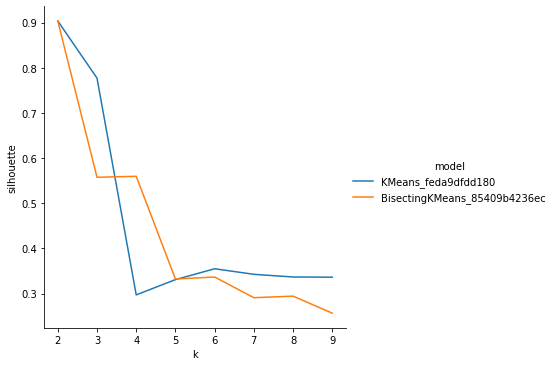

In [0]:
sns.relplot(x="k", y="silhouette", hue="model", data=silhouettes, kind="line");

Out[16]:

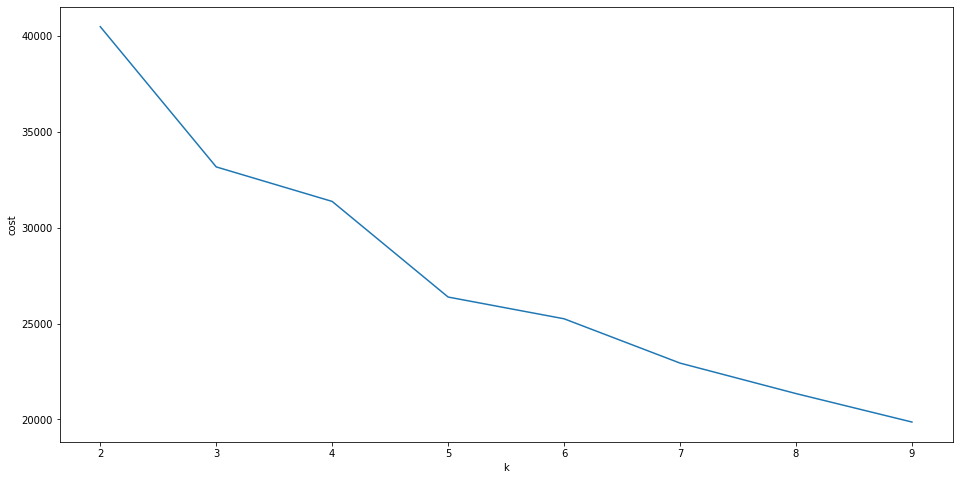

Text(0, 0.5, 'cost')

In [0]:

# Elbow Plot for KMeans to identify best value of k
costs = {}
# Apply k-means with different value of k
for k in range(2, 10):
    k_means = KMeans(k=k)
    model = k_means.fit(X)
    costs[k] = model.summary.trainingCost

# Plot the cost function
fig, ax = plt.subplots(1, 1, figsize =(16, 8))

ax.plot(costs.keys(), costs.values())
ax.set_xlabel('k')
ax.set_ylabel('cost')

In [0]:
k_means = KMeans(k=3)
model_kmeans = k_means.fit(X)
predictions_kmeans = model_kmeans.transform(X)

In [0]:
# trial

silhouette_score=[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='features', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')
for i in range(2,15):
    
    KMeans_algo=KMeans(featuresCol='features', k=i)
    
    KMeans_fit=KMeans_algo.fit(X)
    
    output=KMeans_fit.transform(X)
    
    
    
    score=evaluator.evaluate(output)
    
    silhouette_score.append(score)
    
    print("Silhouette Score:",score)


Silhouette Score: 0.9031700049798853
Silhouette Score: 0.7730327324038238
Silhouette Score: 0.4280228596097897
Silhouette Score: 0.3311308978679024
Silhouette Score: 0.3634770236680605
Silhouette Score: 0.36832205013383346
Silhouette Score: 0.33012926086207056
Silhouette Score: 0.33969385412389463
Silhouette Score: 0.3381982167579274
Silhouette Score: 0.2852239876943852
Silhouette Score: 0.2985065132414392
Silhouette Score: 0.293866511197609
Silhouette Score: 0.3047027624173673

Out[19]:

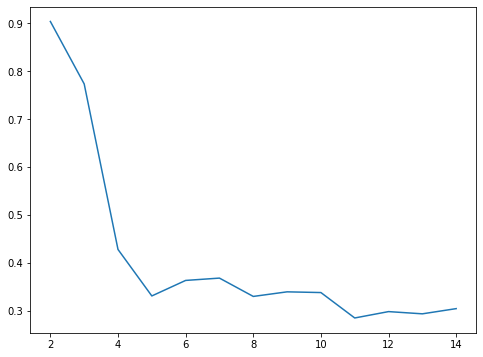

[<matplotlib.lines.Line2D at 0x7f420b169d30>]

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,15),silhouette_score)

#####Cluster 2 shows the highest 'Sihouette Coefficient'

In [0]:
cluster = KMeans( featuresCol='features', k=2)

cluster.fit(X)
        # To get the values of Centroid
centroids = cluster.clusterCenters()
centroid_df = pd.DataFrame(centroids, columns = list(df_z) )
    #print(centroid_df)
prediction=cluster.predict(df_z)
df_z["GROUP"] = prediction
print(df_z.head())

        ## Observing the Clusters
df_z.boxplot(by = 'GROUP',layout=(15,2) ,figsize=(15, 20))

--------------------------------------------------------------------------- 
 AttributeError Traceback (most recent call last)
 <command-2976354463805614> in <module> 
 3 cluster . fit ( X ) 
 4 # To get the values of Centroid 
 ----> 5 centroids = cluster . clusterCenters ( ) 
 6 centroid_df = pd . DataFrame ( centroids , columns = list ( df_z ) ) 
 7 #print(centroid_df) 

 AttributeError : 'KMeans' object has no attribute 'clusterCenters'

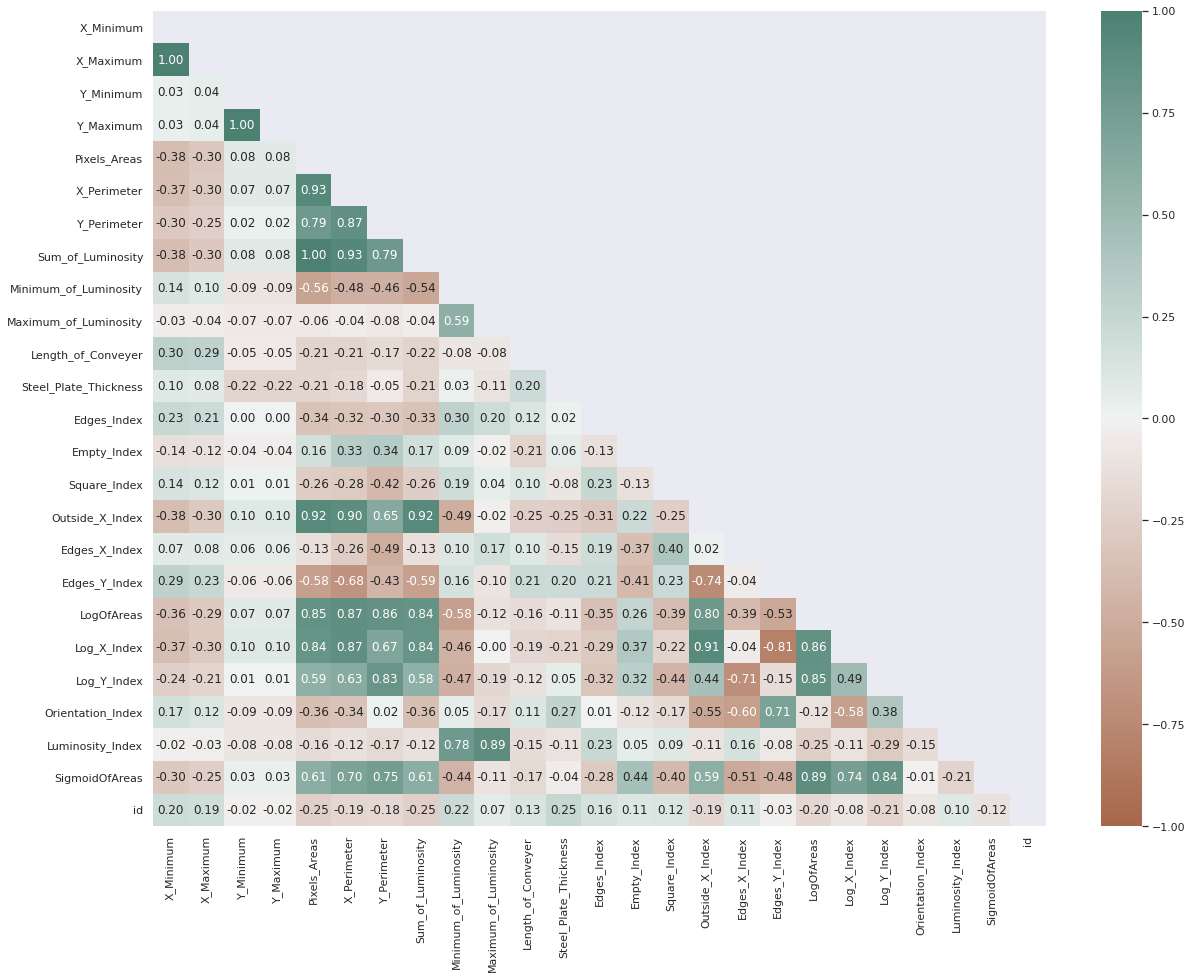

In [0]:
target_columns = ["Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]
categorical_feature_columns = ['TypeOfSteel_A300', 'TypeOfSteel_A400', 'Outside_Global_Index']
from pyspark.ml.feature import VectorAssembler

df1 = df.drop(*target_columns)
labels = df[target_columns]

numerical_feature_columns = df1.drop(*categorical_feature_columns)

sns.set(rc={'figure.figsize':(15,12)})
# correlation between product
cor_items1 = numerical_feature_columns.toPandas().corr()
mask = np.zeros_like(cor_items1)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,15))

color=sns.diverging_palette(30, 164, s=60, as_cmap=True)
display(sns.heatmap(cor_items1, vmin=-1, cmap= color, mask = mask, vmax=1, annot=True, fmt='.2f'))

In [0]:
#Edges_Y_Index, X_perimeter shows strong -ve corr
#Min_of_Luminosity and LogofAreas shows strong -ve corr
#Y_Maximum and Y_minimum shows strong positive corr
#X_Maximum and X_minimum shows strong positive corr
#Edges_Y_index and Outside_X_index shows strong -ve corr
#Log_of_X_Index and Outside_index shows strong -ve corr
#Sum_ofLuminiosity and Pixels_Area shows strong positive corr

####Suggestion for the feature selection in Model

In [0]:

# As per the feature importance graphs following are most useless:
# Y_maximum
# SigmoidOfAreas
# X_perimeter 
# X_Maximum

# Therefore,
# Replace Y_Maximum and Y_minimum with Y_minimum eliminating Y_maximum
# Replace X_Maximum and X_minimum with X_minimum eliminating X_Maximum
# Sum_ofLuminiosity and Pixels_Area with Sum_ofLuminiosity eliminating Pixels_Area
